In [1]:
import ipywidgets as widgets

label = widgets.Label(value="ラベル")
display(label)

Label(value='ラベル')

In [2]:
from tree import Mbtree_GUI
import matplotlib.pyplot as plt

def create_widgets(self):
    self.left_button = self.create_button("←", 50)
    self.up_button = self.create_button("↑", 50)
    self.right_button = self.create_button("→", 50)
    self.down_button = self.create_button("↓", 50)
    self.label = widgets.Label(value="", layout=widgets.Layout(width=f"50px"))
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False   
    
Mbtree_GUI.create_widgets = create_widgets

In [3]:
def display_widgets(self):   
    hbox1 = widgets.HBox([self.label, self.up_button, self.label])
    hbox2 = widgets.HBox([self.left_button, self.label, self.right_button])
    hbox3 = widgets.HBox([self.label, self.down_button, self.label])
    display(widgets.VBox([hbox1, hbox2, hbox3, self.fig.canvas]))  
    
Mbtree_GUI.display_widgets = display_widgets

In [4]:
from tree import Mbtree

mbtree = Mbtree()
mbtree_gui = Mbtree_GUI(mbtree)

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946


In [5]:
from tree import Node

def __init__(self, mb, parent=None, depth=0):
    self.mb = mb
    self.parent = parent
    self.depth = depth
    self.children = []
    self.children_by_move = {}
    
Node.__init__ = __init__

In [6]:
def insert(self, node):
    self.children.append(node)
    self.children_by_move[node.mb.last_move] = node

Node.insert = insert

In [7]:
print(mbtree.nodelist_by_depth[1][0].mb.last_move)

(0, 0)


In [8]:
from pprint import pprint

mbtree = Mbtree()
pprint(mbtree.root.children_by_move)

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946
{(0, 0): <tree.Node object at 0x00000183CC6D6050>,
 (0, 1): <tree.Node object at 0x00000183F42467D0>,
 (0, 2): <tree.Node object at 0x00000183F4267350>,
 (1, 0): <tree.Node object at 0x00000183F41B9E90>,
 (1, 1): <tree.Node object at 0x00000183F4266DD0>,
 (1, 2): <tree.Node object at 0x00000183F4267610>,
 (2, 0): <tree.Node object at 0x00000183F41AFC50>,
 (2, 1): <tree.Node object at 0x00000183F4267090>,
 (2, 2): <tree.Node object at 0x00000183F42678D0>}


In [9]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if self.centernode.depth < 6 and len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.centernode.children_by_move:
                    self.centernode = self.centernode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)

Mbtree_GUI.create_event_handler = create_event_handler

In [10]:
mbtree_gui = Mbtree_GUI(mbtree)

In [12]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if self.centernode.depth < 6 and len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        elif self.centernode.depth < 6:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.centernode.children_by_move:
                    self.centernode = self.centernode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)

Mbtree_GUI.create_event_handler = create_event_handler

In [13]:
mbtree_gui = Mbtree_GUI(mbtree)

In [14]:
class Rect:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

In [15]:
rect = Rect(0, 0, 10, 20)
print(rect)

In [18]:
def __str__(self):
    return f"Rectangle ({self.x}, {self.y}) width = {self.width} height = {self.height}"

Rect.__str__ = __str__

In [17]:
print(rect)

Rectangle (0, 0) width = 10 height = 20


In [19]:
def is_inside(self, x, y):
    return self.x <= x < self.x + self.width and self.y <= y < self.y + self.height

Rect.is_inside = is_inside

In [20]:
print(rect.is_inside(5, 5))
print(rect.is_inside(20, 10))

True
False


In [24]:
from marubatsu import Marubatsu_GUI

def draw_node(self, ax=None, maxdepth=None, emphasize=False, size=0.25, lw=0.8, dx=0, dy=0):
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        self.height = height
            
    # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
    y = dy + (self.height - 3) / 2
    Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, emphasize=emphasize, lw=lw, dx=dx, dy=y)
    rect = Rect(dx, y, 3, 3)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:
        if maxdepth != self.depth:   
            plt.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
            prevy = None
            for childnode in self.children:
                childnodey = dy + (childnode.height - 3) / 2
                if maxdepth is None:
                    Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True, dx=dx+5, dy=childnodey, lw=lw)
                edgey = childnodey + 1.5
                plt.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                if prevy is not None:
                    plt.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                prevy = edgey
                dy += childnode.height
        else:
            plt.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
            
    return rect

Node.draw_node = draw_node

In [25]:
def draw_subtree(self, centernode=None, ax=None, size=0.25, lw=0.8, maxdepth=2):   
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is centernode
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        rect = parent.draw_node(ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            rect = node.draw_node(ax, maxdepth=node.depth, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

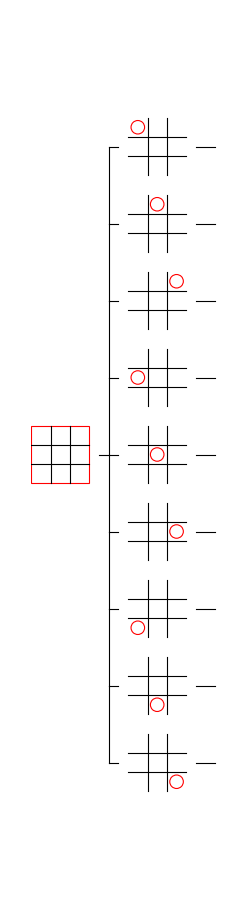

In [26]:
mbtree.draw_subtree(mbtree.root, maxdepth=1)


In [27]:
for rect, node in mbtree.nodes_by_rect.items():
    print(rect)
    print(node.mb)

Rectangle (0, 16.5) width = 3 height = 3
Turn o
...
...
...

Rectangle (5, 0.5) width = 3 height = 3
Turn x
O..
...
...

Rectangle (5, 4.5) width = 3 height = 3
Turn x
.O.
...
...

Rectangle (5, 8.5) width = 3 height = 3
Turn x
..O
...
...

Rectangle (5, 12.5) width = 3 height = 3
Turn x
...
O..
...

Rectangle (5, 16.5) width = 3 height = 3
Turn x
...
.O.
...

Rectangle (5, 20.5) width = 3 height = 3
Turn x
...
..O
...

Rectangle (5, 24.5) width = 3 height = 3
Turn x
...
...
O..

Rectangle (5, 28.5) width = 3 height = 3
Turn x
...
...
.O.

Rectangle (5, 32.5) width = 3 height = 3
Turn x
...
...
..O



In [28]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if self.centernode.depth < 6 and len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        elif self.centernode.depth < 6:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.centernode.children_by_move:
                    self.centernode = self.centernode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if node.depth <= 6 and rect.is_inside(event.xdata, event.ydata):
                self.centernode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)    

Mbtree_GUI.create_event_handler = create_event_handler

In [29]:
mbtree_gui = Mbtree_GUI(mbtree)

In [32]:
def create_widgets(self):
    self.output = widgets.Output()  
    self.left_button = self.create_button("←", 50)
    self.up_button = self.create_button("↑", 50)
    self.right_button = self.create_button("→", 50)
    self.down_button = self.create_button("↓", 50)
    self.help_button = self.create_button("？", 50)
    self.label = widgets.Label(value="", layout=widgets.Layout(width=f"50px"))
    
    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False   
    

Mbtree_GUI.create_widgets = create_widgets

In [36]:
def display_widgets(self):   
    hbox1 = widgets.HBox([self.label, self.up_button, self.label])
    hbox2 = widgets.HBox([self.left_button, self.label, self.right_button,
                          self.label, self.help_button])
    hbox3 = widgets.HBox([self.label, self.down_button, self.label])
    display(widgets.VBox([self.output, hbox1, hbox2, hbox3, self.fig.canvas]))  
    
Mbtree_GUI.display_widgets = display_widgets

In [37]:
mbtree_gui = Mbtree_GUI(mbtree)

In [40]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if self.centernode.depth < 6 and len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
                
    def on_help_button_clicked(b=None):
        self.output.clear_output()
        with self.output:
            print("""操作説明

下記のキーとボタンで中心となるノードを移動できる。ただし、深さが 7 以上のノードへは移動できない
←、0 キー：親ノードへ移動
↑：一つ前の兄弟ノードへ移動
↓：一つ後の兄弟ノードへ移動
→：先頭の子ノードへ移動

テンキーで、対応するマスに着手が行われた子ノードへ移動する
ノードの上でマウスを押すことでそのノードへ移動する
""")
                           
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)
    self.help_button.on_click(on_help_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "0": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
        elif self.centernode.depth < 6:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                move = (x, y)
                if move in self.centernode.children_by_move:
                    self.centernode = self.centernode.children_by_move[move]
                    self.update_gui()
            except:
                pass            
            
    def on_mouse_down(event):
        for rect, node in self.mbtree.nodes_by_rect.items():
            if node.depth <= 6 and rect.is_inside(event.xdata, event.ydata):
                self.centernode = node
                self.update_gui()
                break               
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)    

Mbtree_GUI.create_event_handler = create_event_handler

In [41]:
mbtree_gui = Mbtree_GUI(mbtree)